# Module 20 - Unsupervised Machine Learning Challenge

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Part 1: Prepare the Data

* Reads the csv into pandas
* Previews the DataFrame
* Removes the MYOPIC column from the dataset
* Standardizes the dataset using a scaler
* Names the resulting DataFrame X

In [2]:
# Reading the CSV into pandas, and previewing the DataFrame
df = pd.read_csv("./Resources/myopia.csv")
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Checking if database contains null or duplicated values
print("Null values: ", df.isna().sum().sum())
print("Duplicated values: ", df.duplicated().sum().sum())

Null values:  0
Duplicated values:  0


In [4]:
# Getting the target class from the dataset to color the different clusters in the plot.
labels = df['MYOPIC']
# Removing the "MYOPIC" column from the dataset, since it is not needed for an unsupervised model
df = df.drop('MYOPIC', axis=1)

In [5]:
# Getting the shape of features before reduction (number of rows, number of columns/principal components)
df.shape

(618, 14)

In [6]:
# Standardising the dataset using StandardScaler
X_scaled = StandardScaler().fit_transform(df)

In [7]:
# Printing the resulting scaled DataFrame X
X_scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

## Part 2: Apply Dimensionality Reduction

* PCA model is created and used to reduce dimensions of the scaled dataset
* A model’s explained variance is set to 90% (0.9)
* The shape of the reduced dataset is examined for reduction in number of features
* t-SNE model is created and used to reduce dimensions of the scaled dataset
* t-SNE is used to create a plot of the reduced features

In [8]:
# Initialize PCA model, applying dimensionality reduction - 90% as explained variance
pca = PCA(n_components=0.9)

# Getting the principal components for the scaled data (X_scaled)
myopia_pca = pca.fit_transform(X_scaled)

In [9]:
# Getting the shape of features after reduction (number of rows, number of columns/principal components)
myopia_pca.shape

(618, 10)

In [10]:
# Transform PCA data to a DataFrame, and naming the columns for the reduced 10 Principal Components
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["pc-01", "pc-02", "pc-03", "pc-04", "pc-05", "pc-06", "pc-07", "pc-08", "pc-09", "pc-10"]
)
df_myopia_pca.head()

,pc-01,pc-02,pc-03,pc-04,pc-05,pc-06,pc-07,pc-08,pc-09,pc-10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [11]:
# Creating the t-SNE model to reduce dimensions of the reduced PCA dataset
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df_myopia_pca)

C:\Users\giova\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [12]:
# Getting the shape of features after t-SNE model to reduce dimension (number of rows, number of columns/principal components)
# Check that dimensions have been reduced to 2
tsne_features.shape

(618, 2)

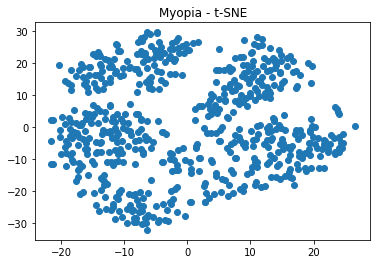

In [13]:
# Plotting the clusters - No colors
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.title('Myopia - t-SNE')
plt.show()

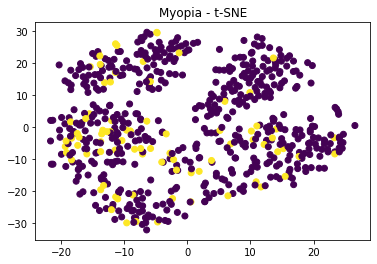

In [14]:
# Plotting the clusters - With colors
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.title('Myopia - t-SNE')
plt.show()

## Part 3: Perform a Cluster Analysis with K-means

* A K-means model is created
* A `for` loop is used to create a list of inertias for each `k` from 1 to 10, inclusive
* A plot is created to examine any elbows that exist
* States a brief (1-2 sentence) conclusion on whether patients can be clustered together, and supports it with findings

In [19]:
# Creating the list of inertias to identify the best number of clusters for the KMeans model using the Elbow Curve
inertia = []
k = list(range(1, 11))

# Ignoring the warning messages.
import warnings
warnings.filterwarnings('ignore')

# Calculate the inertia for the range of k values (from 1 to 10, inclusive)
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,8281.559067
1,2,7042.555862
2,3,6030.953812
3,4,5718.603545
4,5,5467.027168
5,6,5204.443891
6,7,4988.895719
7,8,4834.384869
8,9,4670.325766
9,10,4546.629900


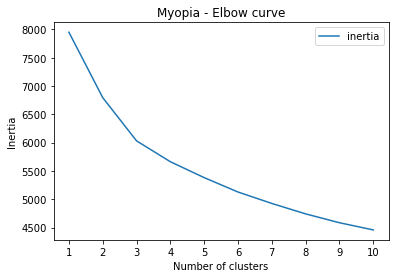

In [16]:
# Plot the elbow curve to find the best candidate(s) for k
df_elbow.plot(x="k", y="inertia")
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Myopia - Elbow curve')
plt.show()

According to Elbow Curve, predicting clusters with `k=3`

In [17]:
# Creating KMeans model using 3 clusters
model = KMeans(n_clusters=3, random_state=42)

# Training the model
model.fit(df_myopia_pca)

# Prediction
prediction = model.predict(df_myopia_pca)

# Add the predicted classes column to the PCA dataframe
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,pc-01,pc-02,pc-03,pc-04,pc-05,pc-06,pc-07,pc-08,pc-09,pc-10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


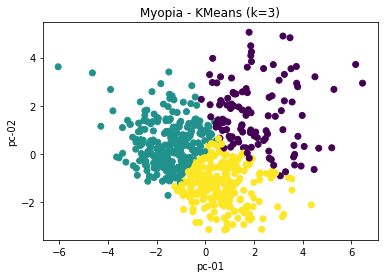

In [18]:
# Plot the 3 clusters based on KMeans model using k=3
plt.scatter(x=df_myopia_pca['pc-01'], y=df_myopia_pca['pc-02'], c=df_myopia_pca['class'])
plt.xlabel('pc-01')
plt.ylabel('pc-02')
plt.title('Myopia - KMeans (k=3)')
plt.show()

## Part 4: Make a Recommendation